In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
%matplotlib inline


In [3]:
loan = pd.read_csv(os.getcwd() + '\\data\\train_loanpred.csv')
tree_loan_cols = ['Gender', 'Married', 'Education',
                  'Self_Employed','ApplicantIncome', 'LoanAmount','Property_Area', 'Loan_Status']
tree_loan = loan[tree_loan_cols]
tree_loan.head(5)


,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,NaN,Urban,Y
1,Male,Yes,Graduate,No,4583,128.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,66.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,120.0,Urban,Y
4,Male,No,Graduate,No,6000,141.0,Urban,Y


In [4]:
tree_loan.isnull().sum().sort_values(ascending=False)

Self_Employed      32
LoanAmount         22
Gender             13
Married             3
Loan_Status         0
Property_Area       0
ApplicantIncome     0
Education           0
dtype: int64

In [5]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(np.array(tree_loan.loc[:, 'LoanAmount']).reshape(-1,1))
tree_loan['LoanAmount'] = imputer.transform(np.array(tree_loan.loc[:, 'LoanAmount']).reshape(-1,1))
tree_loan.head()

c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,146.412162,Urban,Y
1,Male,Yes,Graduate,No,4583,128.000000,Rural,N
2,Male,Yes,Graduate,Yes,3000,66.000000,Urban,Y
3,Male,Yes,Not Graduate,No,2583,120.000000,Urban,Y
4,Male,No,Graduate,No,6000,141.000000,Urban,Y


In [6]:
imputer_clf = SimpleImputer(strategy='most_frequent')
clf_imputer = imputer_clf.fit_transform(tree_loan.drop(columns=['LoanAmount', 'ApplicantIncome'], axis=1))
clf_imputer


array([['Male', 'No', 'Graduate', 'No', 'Urban', 'Y'],
       ['Male', 'Yes', 'Graduate', 'No', 'Rural', 'N'],
       ['Male', 'Yes', 'Graduate', 'Yes', 'Urban', 'Y'],
       ...,
       ['Male', 'Yes', 'Graduate', 'No', 'Urban', 'Y'],
       ['Male', 'Yes', 'Graduate', 'No', 'Urban', 'Y'],
       ['Female', 'No', 'Graduate', 'Yes', 'Semiurban', 'N']],
      dtype=object)

In [7]:
tree_loan['Gender'] = clf_imputer[:,0]
tree_loan['Married'] = clf_imputer[:,1]
tree_loan['Education'] = clf_imputer[:,2]
tree_loan['Self_Employed'] = clf_imputer[:,3]
tree_loan['Property_Area'] = clf_imputer[:,4]
tree_loan['Loan_Status'] = clf_imputer[:,5]
tree_loan.head()

c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,146.412162,Urban,Y
1,Male,Yes,Graduate,No,4583,128.000000,Rural,N
2,Male,Yes,Graduate,Yes,3000,66.000000,Urban,Y
3,Male,Yes,Not Graduate,No,2583,120.000000,Urban,Y
4,Male,No,Graduate,No,6000,141.000000,Urban,Y


In [8]:
tree_loan.isnull().sum().sort_values(ascending=False)

Loan_Status        0
Property_Area      0
LoanAmount         0
ApplicantIncome    0
Self_Employed      0
Education          0
Married            0
Gender             0
dtype: int64

In [9]:
X = tree_loan.iloc[:, :7]
Y = tree_loan.iloc[:, 7]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=22)

In [62]:
x_cat= pd.get_dummies(x_train, drop_first=True)
x_test_cat = pd.get_dummies(x_test, drop_first=True)
print(x_cat.shape)
x_cat.head()

(429, 8)


,ApplicantIncome,LoanAmount,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
278,14583,436.0,1,1,0,0,1,0
507,3583,96.0,1,0,0,0,0,1
430,8624,150.0,0,0,0,1,1,0
58,8080,180.0,1,1,0,0,0,1
538,2917,66.0,1,1,1,0,0,0


In [11]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='best')
clf.fit(x_cat, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
y_pred = clf.predict(x_test_cat)
print("Predicted Results:\n", y_pred)
predictions = clf.predict_proba(x_test_cat)

Predicted Results:
 ['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y']


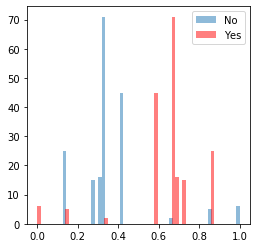

In [13]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(predictions[:,0], bins=50, label="No" , alpha=0.5)
ax.hist(predictions[:,1], bins=50, label="Yes", color='r', alpha =0.5)
ax.legend()

In [14]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import recall_score
recall_score(y_test,y_pred, average='macro') #weighted, micro, binary
print ("Test Accuracy Score : ", accuracy_score(y_test,y_pred)*100) 
print("Test Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Test Classification Report :\n", classification_report(y_test, y_pred))

Test Accuracy Score :  68.10810810810811
Test Confusion Matrix :
 [[  3  49]
 [ 10 123]]
Test Classification Report :
               precision    recall  f1-score   support

           N       0.23      0.06      0.09        52
           Y       0.72      0.92      0.81       133

    accuracy                           0.68       185
   macro avg       0.47      0.49      0.45       185
weighted avg       0.58      0.68      0.61       185



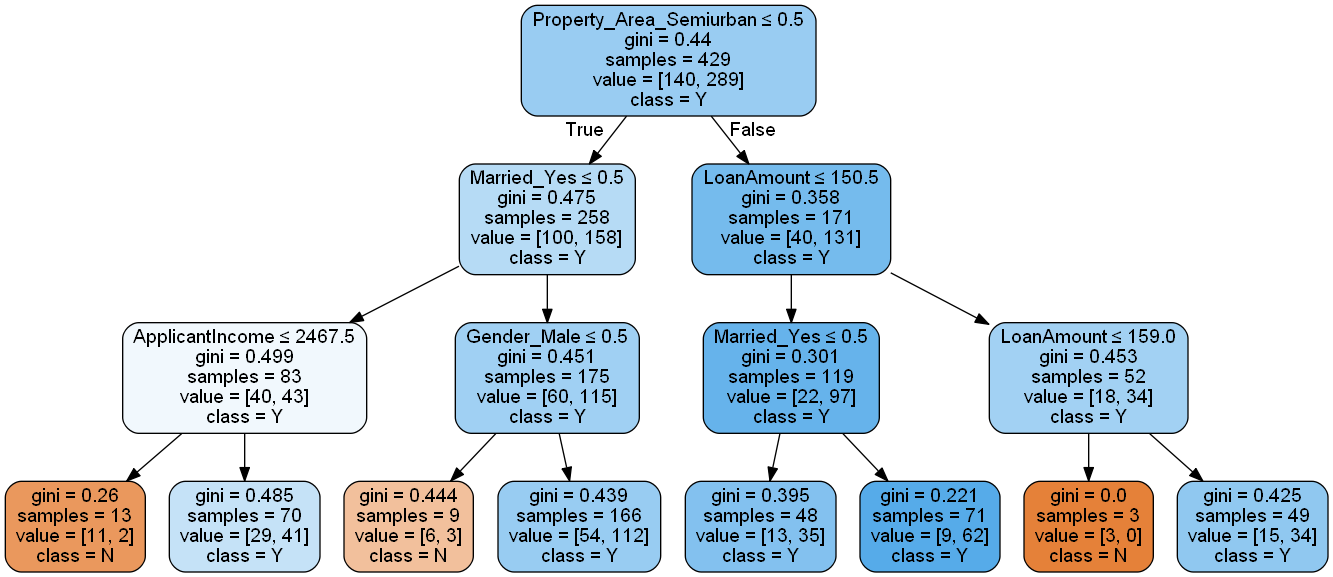

In [16]:
from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = x_cat.columns ,class_names=['N','Y'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("loan_tree.png")
Image(graph.create_png())

[Text(167.4, 190.26, 'X[6] <= 0.5\ngini = 0.44\nsamples = 429\nvalue = [140, 289]'),
 Text(83.7, 135.9, 'X[3] <= 0.5\ngini = 0.475\nsamples = 258\nvalue = [100, 158]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 2467.5\ngini = 0.499\nsamples = 83\nvalue = [40, 43]'),
 Text(20.925, 27.180000000000007, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.485\nsamples = 70\nvalue = [29, 41]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.451\nsamples = 175\nvalue = [60, 115]'),
 Text(104.625, 27.180000000000007, 'gini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(146.475, 27.180000000000007, 'gini = 0.439\nsamples = 166\nvalue = [54, 112]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 150.5\ngini = 0.358\nsamples = 171\nvalue = [40, 131]'),
 Text(209.25, 81.53999999999999, 'X[3] <= 0.5\ngini = 0.301\nsamples = 119\nvalue = [22, 97]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.395\nsamples = 48\nvalue = [13,

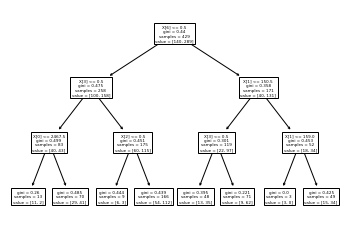

In [17]:
from sklearn import tree 
tree.plot_tree(clf.fit(x_cat, y_train)) 

In [18]:
from sklearn.tree.export import export_text
text = export_text(clf, feature_names=x_cat.columns)

c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

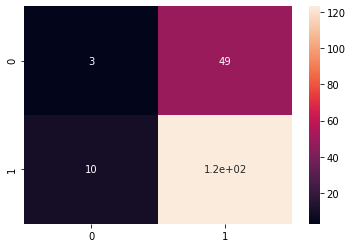

In [22]:
import seaborn as sns
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True)

RF Training score:  0.6783216783216783
RF OOB score:  0.668997668997669
RF Accuracy score:  0.7081081081081081
[0.24657169 0.2721908  0.07784026 0.1485882  0.0375839  0.03448648
 0.15002207 0.0327166 ]


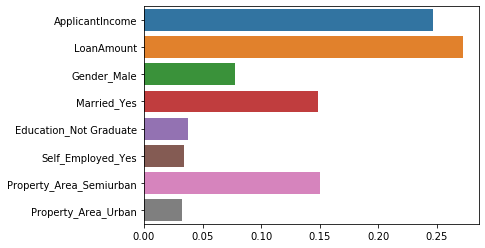

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=3, criterion='entropy', oob_score=True) #max_features=none,log2,auto
rf.fit(x_cat, y_train)
pred_rf = rf.predict(x_test_cat)
print("RF Training score: ", rf.score(x_cat, y_train))
print("RF OOB score: ", rf.oob_score_)
print("RF Accuracy score: ", accuracy_score(y_test, pred_rf))
print(rf.feature_importances_)
sns.barplot(rf.feature_importances_, x_cat.columns)